In [1]:
# %%
import pandas as pd
import os

dir_path = r"C:\Users\leere\OneDrive\Documents\Trading and Betting\Trackers\BF Bot Manager Monthly Records\ALL"

# Get list of all CSV files in the directory and subdirectories
all_files = []
for root, dirs, files in os.walk(dir_path):
    all_files += [os.path.join(root, f) for f in files if
                  f.endswith('.csv') and os.path.getsize(os.path.join(root, f)) > 0]

# Read CSV files into DataFrames
df_list = []
for file in all_files:
    try:
        df_list.append(pd.read_csv(file, encoding='utf-8'))  # Try utf-8 encoding first
    except UnicodeDecodeError:
        try:
            df_list.append(pd.read_csv(file, encoding='latin1'))  # Fallback to latin1 encoding
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate DataFrames if any were read successfully
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
else:
    combined_df = pd.DataFrame()


In [2]:
# Replace any occurrence of " backup" in the "Strategy" column with an empty string
combined_df['Strategy'] = combined_df['Strategy'].str.replace(' backup', '', regex=False)

strategies = ['Dogs - Back fav 1', 'Dogs - Back fav 1 backup', 'Dogs - Back fav 2', 'Dogs - Back fav 2 backup', 'Dogs - Back fav 3', 'Dogs - Back fav 3 backup']
filtered_df = combined_df[combined_df['Strategy'].isin(strategies)].copy()

In [3]:
filtered_df = filtered_df[filtered_df["Status"]=="SETTLED"].copy()
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
116229,10:32 Harlow 1st Nov\A6 415m\4. Moaning Ivy,4. Moaning Ivy,BACK,£0.44,3.75,SETTLED,£1.21,Dogs - Back fav 1,2024-11-01 10:31:50,2024-11-01 10:35:13,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116230,10:48 Harlow 1st Nov\D5 238m\3. Ard Amber,3. Ard Amber,BACK,£0.09,2.54,SETTLED,£0.14,Dogs - Back fav 1,2024-11-01 10:47:50,2024-11-01 10:49:28,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116231,10:52 Central Park 1st Nov\D4 277m\4. Whats Up...,4. Whats Up Carmel,BACK,£0.09,4.00,SETTLED,-£0.09,Dogs - Back fav 1,2024-11-01 10:51:50,2024-11-01 10:53:37,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116232,11:01 Hove 1st Nov\A9 500m\5. Swift Volt,5. Swift Volt,BACK,£0.18,2.66,SETTLED,-£0.18,Dogs - Back fav 1,2024-11-01 11:00:50,2024-11-01 11:04:59,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116233,11:09 Central Park 1st Nov\A5 491m\1. Swift Ella,1. Swift Ella,BACK,£0.27,2.58,SETTLED,-£0.27,Dogs - Back fav 1,0001-01-01 00:00:00,2024-11-01 11:10:57,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148818,21:11 Central Park 26th Oct\A3 491m\6. Lindas ...,6. Lindas Grandkids,BACK,£0.05,2.80,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 21:10:50,2024-10-26 21:14:11,NaN,NaN,"£12,132.35",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
148830,21:04 Monmore 26th Oct\OR3 480m\2. Vixons Filofax,2. Vixons Filofax,BACK,£0.10,1.48,SETTLED,£0.05,Dogs - Back fav 1,2024-10-26 21:04:06,2024-10-26 21:07:00,NaN,NaN,"£9,503.23",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
148837,20:59 Hove 26th Oct\A1 500m\4. Garys Angels,4. Garys Angels,BACK,£0.05,2.86,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 20:58:50,2024-10-26 21:03:23,NaN,NaN,"£14,212.30",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
148851,20:54 Central Park 26th Oct\D3 277m\5. Boherna...,5. Boherna Bruno,BACK,£0.10,1.97,SETTLED,£0.10,Dogs - Back fav 1,2024-10-26 20:53:50,2024-10-26 20:56:34,NaN,NaN,"£14,455.38",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN


In [4]:
# Ensure 'Settled date' is a datetime column
filtered_df.loc[:, 'Settled date'] = pd.to_datetime(filtered_df['Settled date'], errors='coerce')

# Order the DataFrame by the 'Settled date' column
filtered_df = filtered_df.sort_values(by='Settled date').reset_index(drop=True)
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
0,20:43 Oxford 26th Oct\OR 450m\3. Rioja Maxi,3. Rioja Maxi,BACK,£0.05,2.70,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 20:42:50,2024-10-26 20:47:54,NaN,NaN,"£10,040.98",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
1,20:54 Central Park 26th Oct\D3 277m\5. Boherna...,5. Boherna Bruno,BACK,£0.10,1.97,SETTLED,£0.10,Dogs - Back fav 1,2024-10-26 20:53:50,2024-10-26 20:56:34,NaN,NaN,"£14,455.38",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
2,20:59 Hove 26th Oct\A1 500m\4. Garys Angels,4. Garys Angels,BACK,£0.05,2.86,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 20:58:50,2024-10-26 21:03:23,NaN,NaN,"£14,212.30",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
3,21:04 Monmore 26th Oct\OR3 480m\2. Vixons Filofax,2. Vixons Filofax,BACK,£0.10,1.48,SETTLED,£0.05,Dogs - Back fav 1,2024-10-26 21:04:06,2024-10-26 21:07:00,NaN,NaN,"£9,503.23",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
4,21:11 Central Park 26th Oct\A3 491m\6. Lindas ...,6. Lindas Grandkids,BACK,£0.05,2.80,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 21:10:50,2024-10-26 21:14:11,NaN,NaN,"£12,132.35",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219,16:41 Sunderland 25th Nov\A5 450m\1. Missouri ...,1. Missouri Dove,BACK,£0.08,4.40,SETTLED,-£0.08,Dogs - Back fav 2,2024-11-25 16:40:50,2024-11-25 16:43:22,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
6220,16:41 Sunderland 25th Nov\A5 450m\2. Witton Kiwi,2. Witton Kiwi,BACK,£0.20,6.20,SETTLED,-£0.20,Dogs - Back fav 3,2024-11-25 16:40:50,2024-11-25 16:43:22,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
6221,16:47 Central Park 25th Nov\D3 277m\6. Glashee...,6. Glasheen Mist,BACK,£0.22,4.10,SETTLED,-£0.22,Dogs - Back fav 3,2024-11-25 16:46:50,2024-11-25 16:50:01,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
6222,16:47 Central Park 25th Nov\D3 277m\2. Canal R...,2. Canal River,BACK,£0.10,3.60,SETTLED,-£0.10,Dogs - Back fav 2,2024-11-25 16:46:50,2024-11-25 16:50:01,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

# Assuming `filtered_df` is your DataFrame
# First, convert the 'P/L' column to numeric, coercing non-numeric values to NaN
filtered_df['P/L'] = filtered_df['P/L'].replace('[£,]', '', regex=True).astype(float)
# filtered_df['P/L'] = pd.to_numeric(filtered_df['P/L'], errors='coerce')

# Now perform the operation, making sure to exclude NaN values
filtered_df.loc[filtered_df['P/L'].notna() & (filtered_df['P/L'] > 0), 'P/L'] *= 0.98


In [6]:
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
0,20:43 Oxford 26th Oct\OR 450m\3. Rioja Maxi,3. Rioja Maxi,BACK,£0.05,2.70,SETTLED,-0.050,Dogs - Back fav 1,2024-10-26 20:42:50,2024-10-26 20:47:54,NaN,NaN,"£10,040.98",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
1,20:54 Central Park 26th Oct\D3 277m\5. Boherna...,5. Boherna Bruno,BACK,£0.10,1.97,SETTLED,0.098,Dogs - Back fav 1,2024-10-26 20:53:50,2024-10-26 20:56:34,NaN,NaN,"£14,455.38",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
2,20:59 Hove 26th Oct\A1 500m\4. Garys Angels,4. Garys Angels,BACK,£0.05,2.86,SETTLED,-0.050,Dogs - Back fav 1,2024-10-26 20:58:50,2024-10-26 21:03:23,NaN,NaN,"£14,212.30",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
3,21:04 Monmore 26th Oct\OR3 480m\2. Vixons Filofax,2. Vixons Filofax,BACK,£0.10,1.48,SETTLED,0.049,Dogs - Back fav 1,2024-10-26 21:04:06,2024-10-26 21:07:00,NaN,NaN,"£9,503.23",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
4,21:11 Central Park 26th Oct\A3 491m\6. Lindas ...,6. Lindas Grandkids,BACK,£0.05,2.80,SETTLED,-0.050,Dogs - Back fav 1,2024-10-26 21:10:50,2024-10-26 21:14:11,NaN,NaN,"£12,132.35",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219,16:41 Sunderland 25th Nov\A5 450m\1. Missouri ...,1. Missouri Dove,BACK,£0.08,4.40,SETTLED,-0.080,Dogs - Back fav 2,2024-11-25 16:40:50,2024-11-25 16:43:22,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
6220,16:41 Sunderland 25th Nov\A5 450m\2. Witton Kiwi,2. Witton Kiwi,BACK,£0.20,6.20,SETTLED,-0.200,Dogs - Back fav 3,2024-11-25 16:40:50,2024-11-25 16:43:22,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
6221,16:47 Central Park 25th Nov\D3 277m\6. Glashee...,6. Glasheen Mist,BACK,£0.22,4.10,SETTLED,-0.220,Dogs - Back fav 3,2024-11-25 16:46:50,2024-11-25 16:50:01,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
6222,16:47 Central Park 25th Nov\D3 277m\2. Canal R...,2. Canal River,BACK,£0.10,3.60,SETTLED,-0.100,Dogs - Back fav 2,2024-11-25 16:46:50,2024-11-25 16:50:01,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN


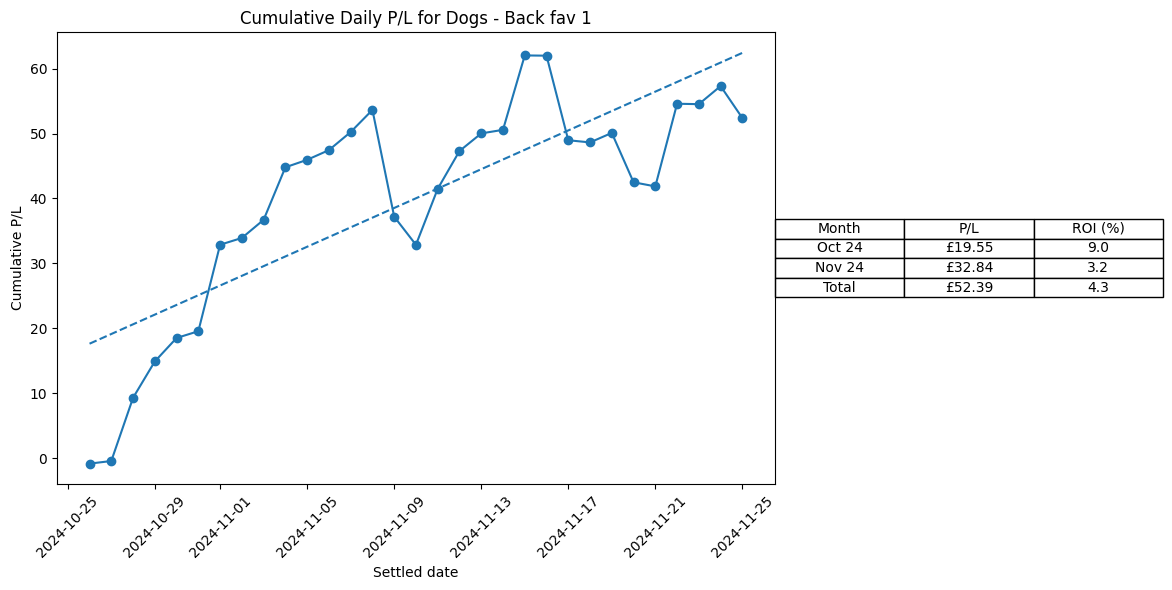

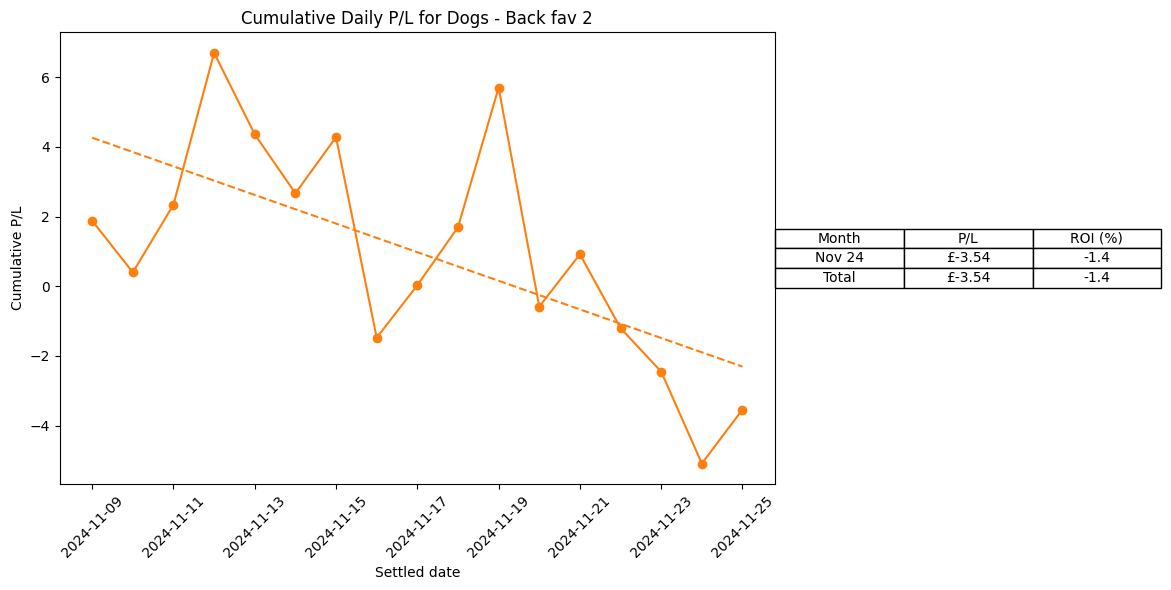

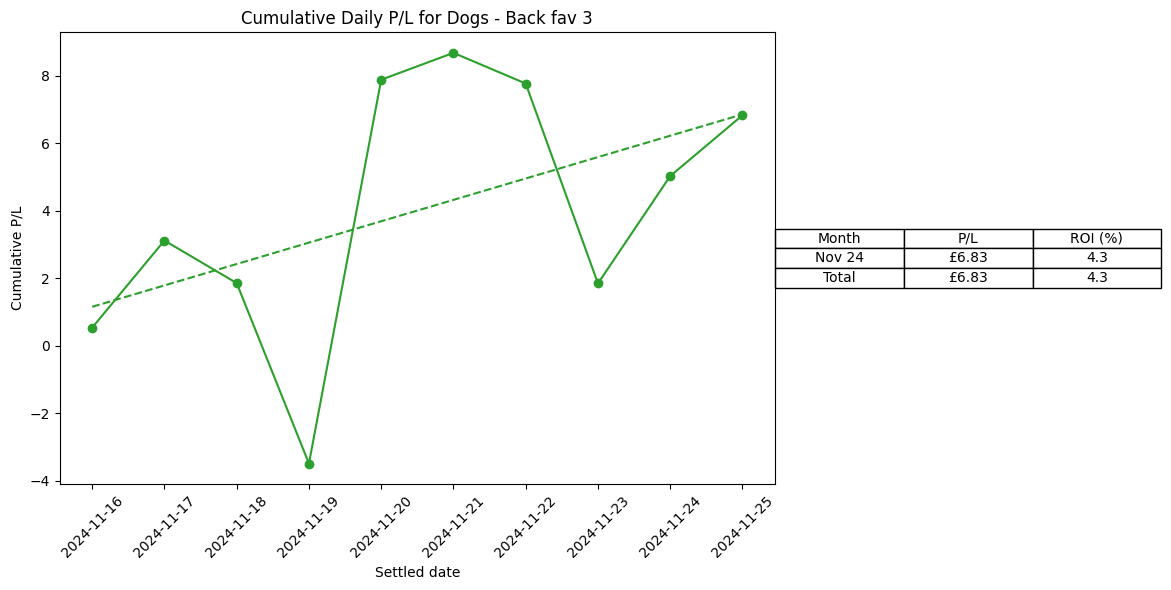

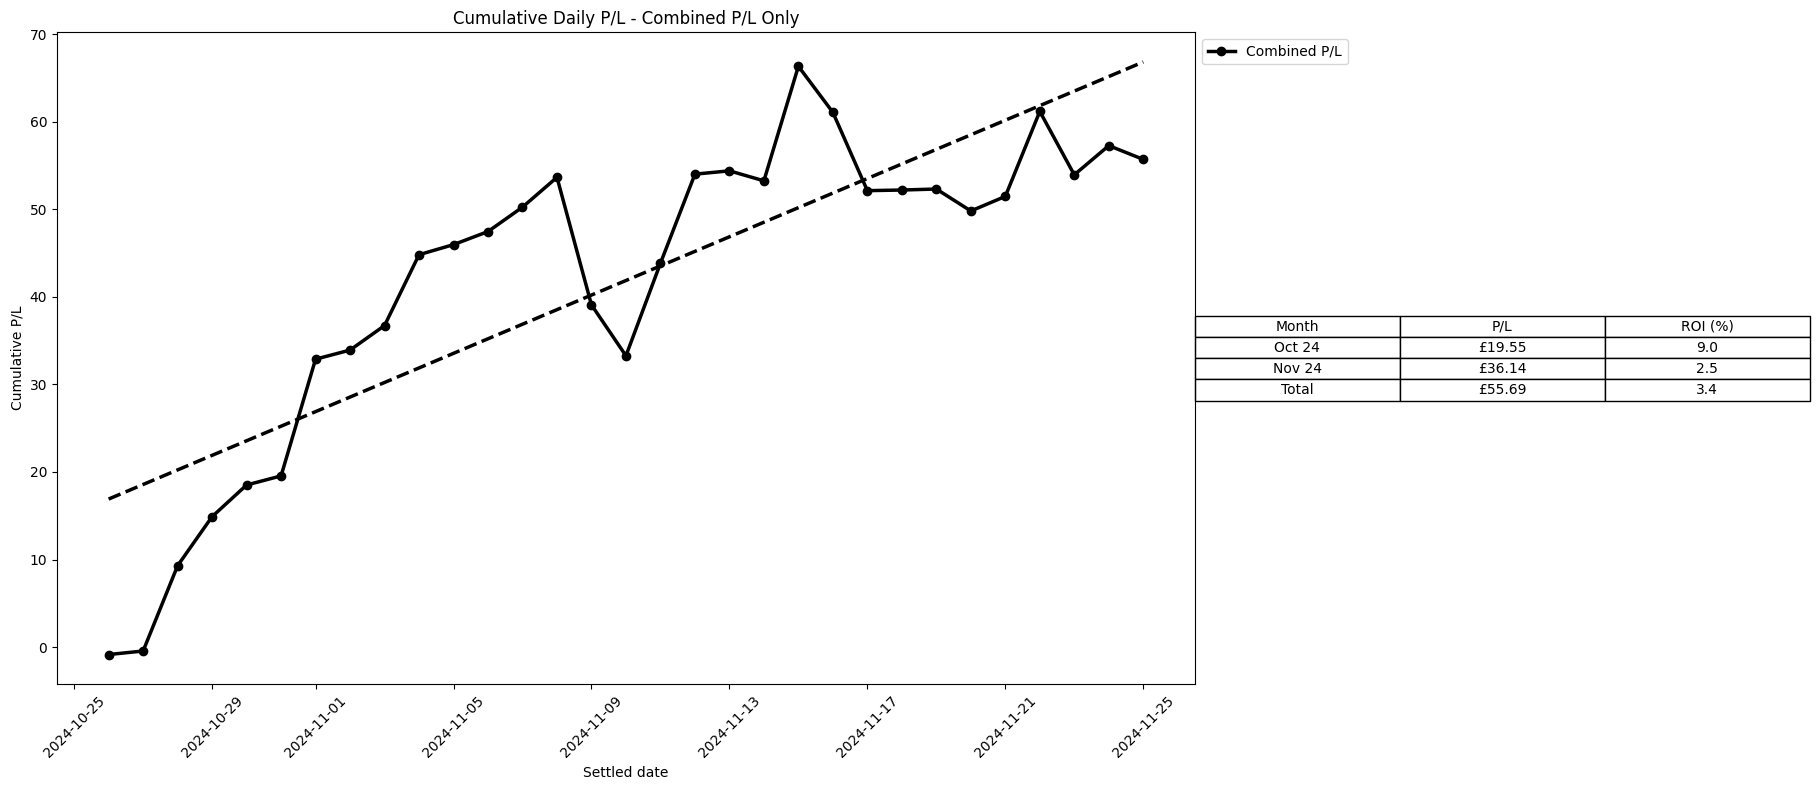

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the DataFrame to avoid changing the original
grouped_df = filtered_df.copy()

# Convert P/L and Matched amount columns to numeric
grouped_df['P/L'] = grouped_df['P/L'].replace('[£,]', '', regex=True).astype(float)
grouped_df['Matched amount'] = grouped_df['Matched amount'].replace('[£,]', '', regex=True).astype(float)

# Ensure 'Settled date' is a datetime column and extract the date part only
grouped_df['Settled date'] = pd.to_datetime(grouped_df['Settled date'], errors='coerce').dt.date

# Group by 'Strategy' and 'Settled date' and calculate daily P/L
daily_pl_df = grouped_df.groupby(['Strategy', 'Settled date'])['P/L'].sum().reset_index()

# Calculate cumulative P/L by day for each strategy
daily_pl_df['Cumulative P/L'] = daily_pl_df.groupby('Strategy')['P/L'].cumsum()

# Plot cumulative P/L for each strategy with trendlines and different colors
strategies = daily_pl_df['Strategy'].unique()

colors = plt.get_cmap('tab10')  # Get a color map for different strategies

# Loop through each strategy to create individual plots with monthly summaries
for i, strategy in enumerate(strategies):
    strategy_df = daily_pl_df[daily_pl_df['Strategy'] == strategy]

    # Monthly P/L and ROI calculation
    monthly_df = grouped_df[grouped_df['Strategy'] == strategy].copy()
    monthly_df['Month'] = monthly_df['Settled date'].apply(lambda x: x.strftime('%b %y'))  # Change format to "Oct 24"
    monthly_df['Month'] = pd.to_datetime(monthly_df['Month'], format='%b %y')
    monthly_summary = monthly_df.groupby('Month').agg({
        'P/L': 'sum',
        'Matched amount': 'sum'
    }).reset_index()
    monthly_summary['ROI'] = (monthly_summary['P/L'] / monthly_summary['Matched amount']) * 100

    # Calculate total ROI for all months
    total_months_pl = monthly_summary['P/L'].sum()
    total_months_matched = monthly_summary['Matched amount'].sum()
    total_months_roi = (total_months_pl / total_months_matched) * 100

    # Sort months in ascending order
    monthly_summary = monthly_summary.sort_values('Month')

    # Format P/L with '£' and round to 2 decimal places. Round ROI to 1 decimal place.
    monthly_summary['P/L'] = monthly_summary['P/L'].apply(lambda x: f"£{x:.2f}")
    monthly_summary['ROI'] = monthly_summary['ROI'].round(1)
    monthly_summary['Month'] = monthly_summary['Month'].dt.strftime('%b %y')

    # Add "Total" row for total P/L and ROI
    total_row = pd.DataFrame({
        'Month': ['Total'],
        'P/L': [f"£{total_months_pl:.2f}"],
        'Matched amount': [f"£{total_months_matched:.2f}"],
        'ROI': [total_months_roi.round(1)]
    })
    monthly_summary = pd.concat([monthly_summary, total_row], ignore_index=True)

    fig, ax1 = plt.subplots(figsize=(12, 6))  # Set the figure size for better layout
    ax1.plot(strategy_df['Settled date'], strategy_df['Cumulative P/L'], marker='o', color=colors(i),
             label=strategy)  # Use 'o' marker

    # Trendline
    z = np.polyfit(np.arange(len(strategy_df)), strategy_df['Cumulative P/L'], 1)
    p = np.poly1d(z)
    ax1.plot(strategy_df['Settled date'], p(np.arange(len(strategy_df))), "--", color=colors(i))

    ax1.set_title(f'Cumulative Daily P/L for {strategy}')
    ax1.set_xlabel('Settled date')
    ax1.set_ylabel('Cumulative P/L')
    ax1.tick_params(axis='x', rotation=45)

    # Table with monthly P/L, ROI, and Total P/L and ROI
    table_data = monthly_summary[['Month', 'P/L', 'ROI']].values
    col_labels = ['Month', 'P/L', 'ROI (%)']
    table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='right',
                      colWidths=[0.15] * 3)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.subplots_adjust(right=0.65)  # Adjust layout to make room for the table
    plt.show()

# Combined plot for all strategies
fig, ax = plt.subplots(figsize=(16, 8))

combined_data = daily_pl_df.groupby('Settled date')['P/L'].sum().reset_index()
combined_data['Cumulative P/L'] = combined_data['P/L'].cumsum()

# Add a plot line for combined P/L
ax.plot(combined_data['Settled date'], combined_data['Cumulative P/L'], marker='o', color='black', linewidth=2.5,
        label='Combined P/L')

# Add a trendline for the combined P/L
z_combined = np.polyfit(np.arange(len(combined_data)), combined_data['Cumulative P/L'], 1)
p_combined = np.poly1d(z_combined)
ax.plot(combined_data['Settled date'], p_combined(np.arange(len(combined_data))), "--", color='black', linewidth=2.5)

ax.set_title('Cumulative Daily P/L - Combined P/L Only')
ax.set_xlabel('Settled date')
ax.set_ylabel('Cumulative P/L')
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Summary DataFrame for combined P/L monthly summary
combined_monthly_df = grouped_df.copy()
combined_monthly_df['Month'] = combined_monthly_df['Settled date'].apply(lambda x: x.strftime('%b %y'))
combined_monthly_df['Month'] = pd.to_datetime(combined_monthly_df['Month'], format='%b %y')
combined_monthly_summary = combined_monthly_df.groupby('Month').agg({
    'P/L': 'sum',
    'Matched amount': 'sum'
}).reset_index()
combined_monthly_summary['ROI'] = (combined_monthly_summary['P/L'] / combined_monthly_summary['Matched amount']) * 100

# Calculate total ROI for all months
total_combined_pl = combined_monthly_summary['P/L'].sum()
total_combined_matched = combined_monthly_summary['Matched amount'].sum()
total_combined_roi = (total_combined_pl / total_combined_matched) * 100

# Sort months in ascending order
combined_monthly_summary = combined_monthly_summary.sort_values('Month')

# Format P/L with '£' and round to 2 decimal places. Round ROI to 1 decimal place.
combined_monthly_summary['P/L'] = combined_monthly_summary['P/L'].apply(lambda x: f"£{x:.2f}")
combined_monthly_summary['ROI'] = combined_monthly_summary['ROI'].round(1)
combined_monthly_summary['Month'] = combined_monthly_summary['Month'].dt.strftime('%b %y')

# Add "Total" row for total P/L and ROI
total_combined_row = pd.DataFrame({
    'Month': ['Total'],
    'P/L': [f"£{total_combined_pl:.2f}"],
    'Matched amount': [f"£{total_combined_matched:.2f}"],
    'ROI': [total_combined_roi.round(1)]
})
combined_monthly_summary = pd.concat([combined_monthly_summary, total_combined_row], ignore_index=True)

table_data_combined = combined_monthly_summary[['Month', 'P/L', 'ROI']].values
col_labels_combined = ['Month', 'P/L', 'ROI (%)']
table_combined = plt.table(cellText=table_data_combined, colLabels=col_labels_combined, cellLoc='center', loc='right',
                           colWidths=[0.15] * 3)
table_combined.auto_set_font_size(False)
table_combined.set_fontsize(10)
table_combined.scale(1.2, 1.2)

plt.tight_layout()
plt.subplots_adjust(right=0.75)  # Adjust layout to make room for the legend and table
plt.show()